In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Dataset link
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

In [2]:
import pandas as pd
cust_df = pd.read_csv("E:\Study Files\End to End AI\Deep learning/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df = cust_df.drop('Address', axis=1)
df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8


In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]# [allrows,1stcol :till end]
X #all the usef}ul columns

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [5]:
X = np.nan_to_num(X) #empty cells with 0

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet.shape

(850, 8)

In [6]:
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [7]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.8, min_samples=6).fit(Clus_dataSet) #eps = radius , min_samples= m =  10
labels = db.labels_

In [8]:
print(labels[0:5])
print(labels.shape)
print("number of classes =",set(labels))

[ 0  0  1  0 -1]
(850,)
number of classes = {0, 1, -1}


In [9]:
cust_df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8


In [10]:
df["Class"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Class
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,-1


In [11]:
df.drop(['Customer Id'],axis = 1, inplace = True)

In [12]:
income = df['Income'].values
Age = df['Years Employed'].values
print(income[0:5])
print(Age[0:5])

[ 19 100  57  19 253]
[ 6 26 10  4 31]


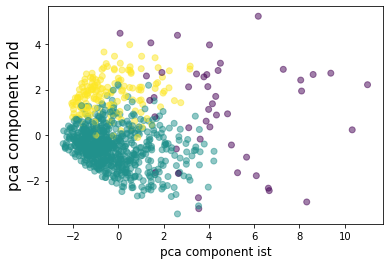

In [14]:
from sklearn.decomposition import PCA #8 column -> 2 columns
pca = PCA(n_components=2) #i need 2d data
pca.fit(Clus_dataSet) #training 
x_pca = pca.transform(Clus_dataSet) #independent var as 2columns
plt.scatter(x_pca[:,0],x_pca[:,1], c=df['Class'], alpha=0.5)
plt.xlabel('pca component ist', fontsize=12)
plt.ylabel('pca component 2nd', fontsize=15)

plt.show()